# Example - 78 - Uranus Orbiter - Probe Targeting and Orbiter Deflection

In this example, we extend the previous example (77) to illustrate the use of the AMAT.orbiter.Orbiter module to compute the probe targeting manuever, trajectory, probe entry state, and orbiter deflection manuever.

In [1]:
import numpy as np

from AMAT.planet import Planet
from AMAT.vehicle import Vehicle
from AMAT.approach import Approach
from AMAT.orbiter import Orbiter

## Compute the approach trajectory

In [2]:
probe1 = Approach("URANUS",
                  v_inf_vec_icrf_kms=np.array([-9.62521831, 16.51192666, 7.46493598]),
                  rp=(25559 + 345) * 1e3, psi=np.pi,
                  is_entrySystem=True, h_EI=1000e3)

theta_star_arr_probe1 = np.linspace(-1.8, probe1.theta_star_entry, 101)
pos_vec_bi_arr_probe1 = probe1.pos_vec_bi(theta_star_arr_probe1) / 25559e3

x_arr_probe1 = pos_vec_bi_arr_probe1[0][:]
y_arr_probe1 = pos_vec_bi_arr_probe1[1][:]
z_arr_probe1 = pos_vec_bi_arr_probe1[2][:]

## Compute the aerocapture corridor

In [3]:
# setup the Planet object
planet=Planet("URANUS")
planet.h_skip = 1000e3
planet.loadAtmosphereModel('../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_low = 120e3
planet.h_trap= 100e3

# Setup the vehicle object : assume m=3000 kg, beta=200 kg/m2
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

# Compute the corridor bounds and TCW
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -11.0088 deg
Undershoot limit : -12.0264 deg
TCW: 1.0176 deg


## Get a propagated vehicle object with an exit state

In [4]:
# propogate the overshoot trajectory
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,overShootLimit,0.0,0.0)
vehicle.propogateEntry2(2400.0,0.1,180.0)

## Compute the coast phase trajectory, PRM dv, and full orbit trajectory

In [5]:
orbiter = Orbiter(vehicle, peri_alt_km=4000.0)

In [6]:
# print the periapsis raise manuever DV
print("PRM DV VEC, m/s: "+str(orbiter.PRM_dv_vec))
print("PRM DV MAG, m/s: "+str(orbiter.PRM_dv_mag))

PRM DV VEC, m/s: [ 64.07245044 -12.31975871   8.76878289]
PRM DV MAG, m/s: 65.83271916788875


Run the file ```example-77-uranus-orbiter-coast-and-orbit.py``` for a visualization of the hyperbolic approach, coast phase and the final orbit trajectory.

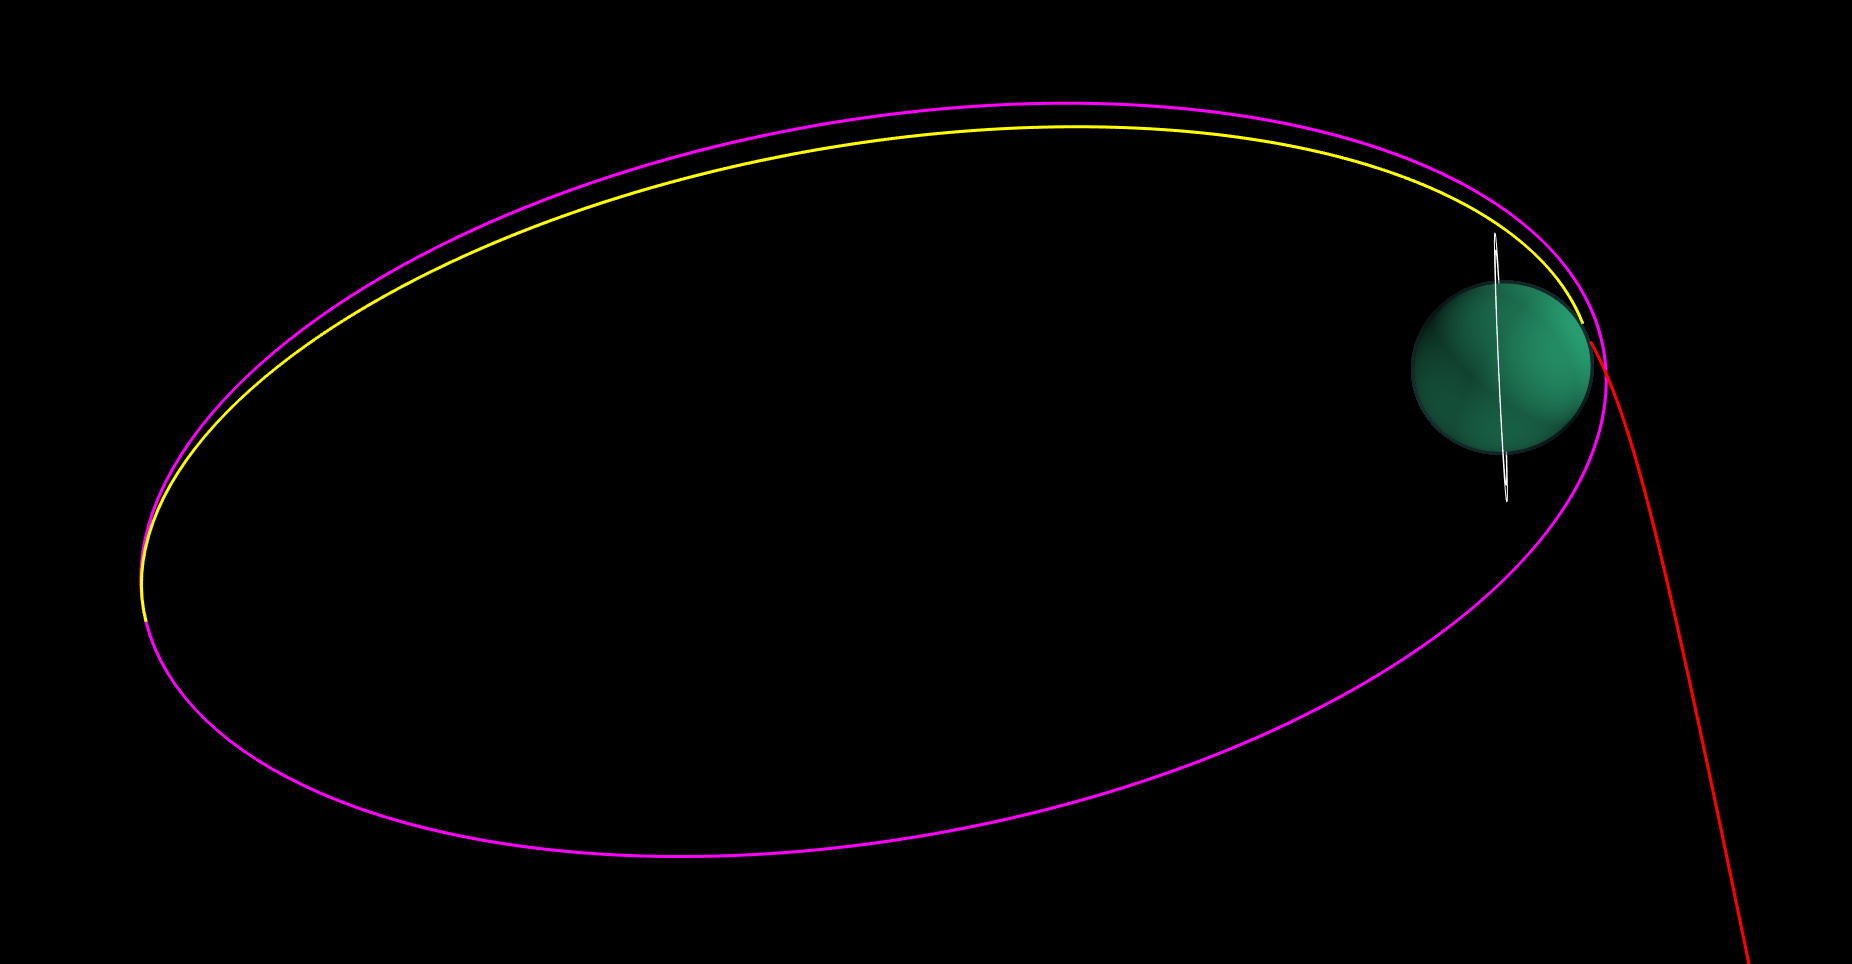

In [7]:
from IPython.display import Image
Image(filename="../plots/example-77-uranus-coast-and-orbit.png", width=1200)

## Perform a probe-targeting maneuver

Perform a probe targeting manuever at theta_star = 178 deg, dV = -90 m/s

In [8]:
orbiter.compute_probe_targeting_trajectory(178 * np.pi / 180, -90)

In [9]:
# print the probe targeting manuever orbit periapsis altitude
print("Probe approach orbit periapsis alt. km : "+str(orbiter.h_periapsis_probe/1e3))

Probe approach orbit periapsis alt. km : -716.3110821775309


In [10]:
# print the probe atmospheric entry state
print("Entry altitude, km: "+ str(orbiter.h_EI/1e3))
print("Entry longitude BI, km: "+ str(round(orbiter.longitude_probe_entry_bi*180/np.pi, 2)))
print("Entry latitude BI, deg: "+ str(round(orbiter.latitude_probe_entry_bi*180/np.pi, 2)))
print("Atm. relative entry speed, km/s: "+str(round(orbiter.v_mag_probe_entry_atm/1e3, 4)))
print("Atm. relative heading angle, deg: "+str(round(orbiter.heading_atm_probe_entry*180/np.pi, 4)))
print("Atm. relative EFPA, deg: "+str(round(orbiter.gamma_atm_probe_entry*180/np.pi, 4)))

Entry altitude, km: 1000.0
Entry longitude BI, km: -10.96
Entry latitude BI, deg: 67.49
Atm. relative entry speed, km/s: 20.4018
Atm. relative heading angle, deg: 87.1923
Atm. relative EFPA, deg: -14.0304


## Perform an orbiter deflection manuever

Perform an orbiter deflection manuever at theta_star = 182 deg, dV = +75 m/s

In [11]:
orbiter.compute_orbiter_deflection_trajectory(182 * np.pi / 180, 75)

In [12]:
# print the orbiter deflection orbit periapsis altitude
print("Orbiter deflection orbit periapsis alt. km : "+str(orbiter.h_periapsis_orbiter_defl/1e3))

Orbiter deflection orbit periapsis alt. km : 3228.49260690267


## Plot the probe targeting and orbiter deflection maneuvers

Run the file ```example-78-intial-orbit-and-probe-approach-trajectory.py``` to visualize the trajectories.

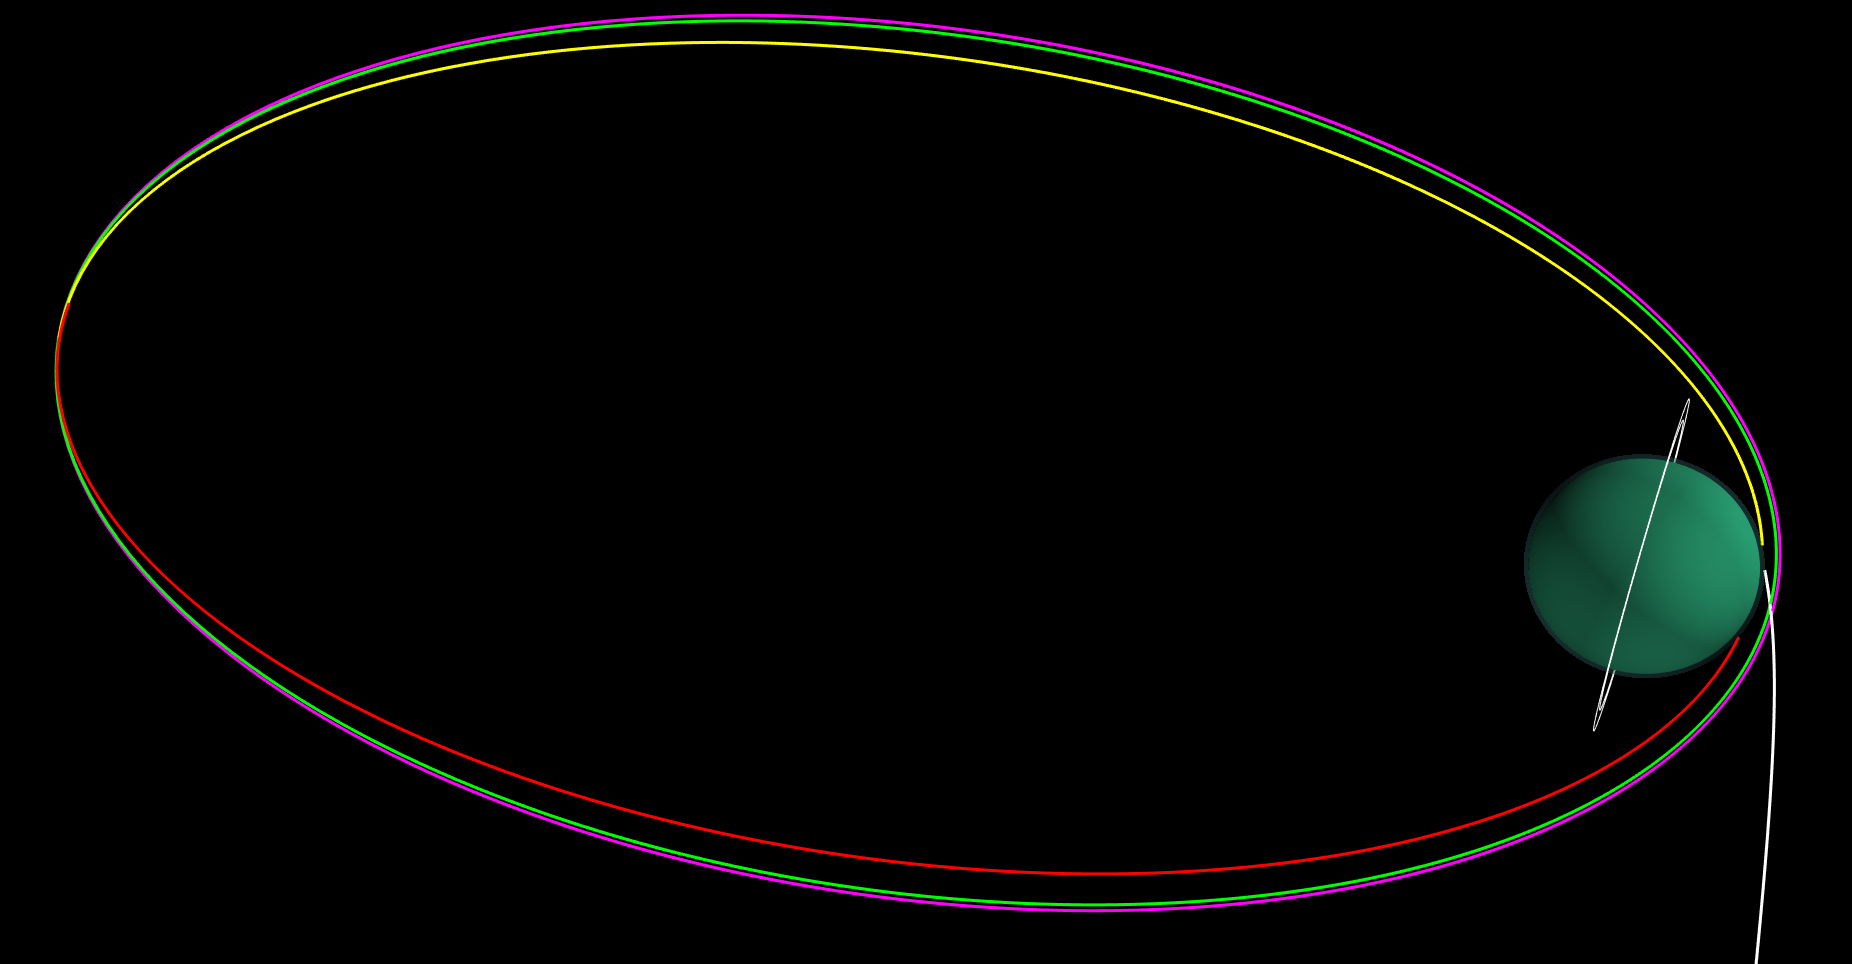

In [13]:
Image(filename="../plots/example-78-uranus-probe-delivery-from-orbit.png", width=1200)

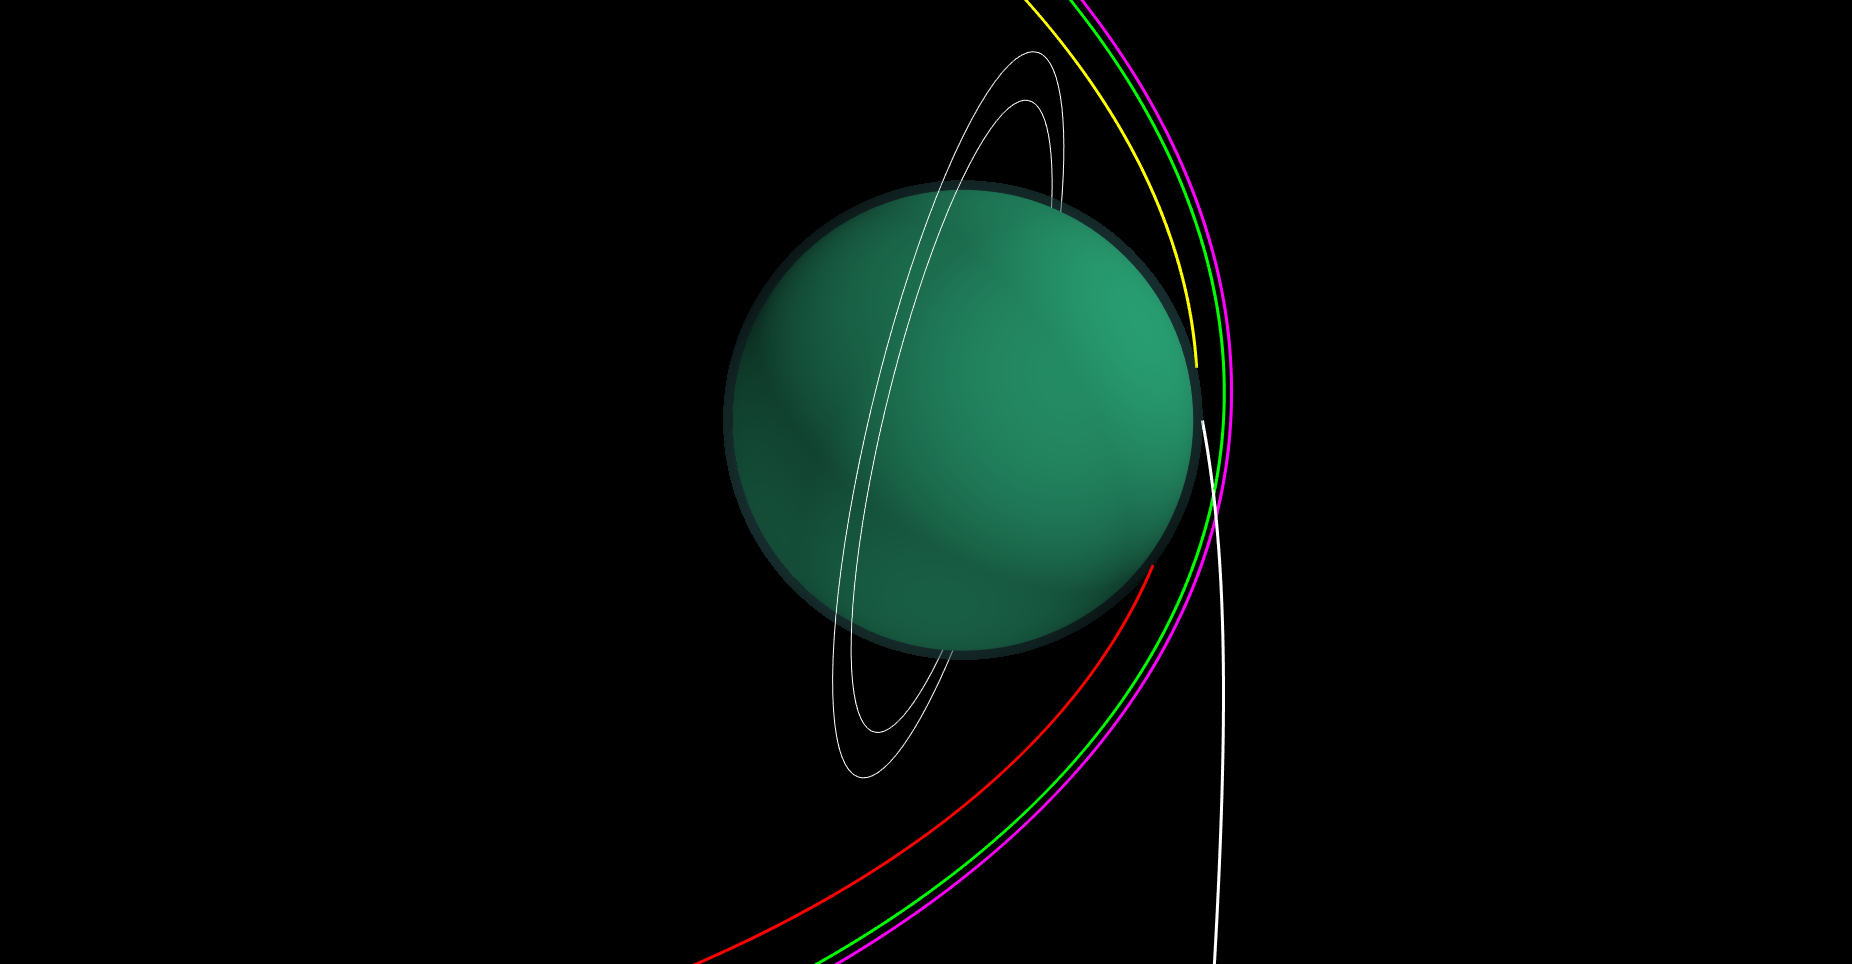

In [14]:
Image(filename="../plots/example-78-uranus-probe-delivery-from-orbit-close-up.png", width=1200)